<a href="https://www.kaggle.com/code/yorkyong/global-superstore-dataset-data-exploration?scriptVersionId=156921631" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-superstore-dataset/superstore.csv


In [2]:
csv_file_path = '/kaggle/input/global-superstore-dataset/superstore.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame to verify the data has been loaded successfully
print(df.head())

          Category         City        Country Customer.ID     Customer.Name  \
0  Office Supplies  Los Angeles  United States   LS-172304  Lycoris Saunders   
1  Office Supplies  Los Angeles  United States   MV-174854     Mark Van Huff   
2  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
3  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
4  Office Supplies  Los Angeles  United States   AP-109154    Arthur Prichep   

   Discount Market  记录数               Order.Date        Order.ID  ... Sales  \
0       0.0     US    1  2011-01-07 00:00:00.000  CA-2011-130813  ...    19   
1       0.0     US    1  2011-01-21 00:00:00.000  CA-2011-148614  ...    19   
2       0.0     US    1  2011-08-05 00:00:00.000  CA-2011-118962  ...    21   
3       0.0     US    1  2011-08-05 00:00:00.000  CA-2011-118962  ...   111   
4       0.0     US    1  2011-09-29 00:00:00.000  CA-2011-146969  ...     6   

    Segment                Ship.Date       S

In [3]:
# Display basic information about the DataFrame
print(df.info())

# Display summary statistics for numerical columns
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales           51290 non-null 

In [4]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (e.g., by dropping or imputing)
# Example: df.dropna() or df.fillna()

Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
记录数               0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64


In [5]:
# Check for duplicate rows
print(df.duplicated().sum())

# Remove duplicates if necessary
# Example: df.drop_duplicates(inplace=True)

0


# **Value Counts:**
* Display the counts of unique values in categorical columns.

In [6]:
categorical_columns = ['Category', 'City', 'Country', 'Market', 'Order.Priority', 'Region', 'Segment', 'Ship.Mode', 'State', 'Sub.Category', 'Market2']

for column in categorical_columns:
    print(df[column].value_counts())

Category
Office Supplies    31273
Technology         10141
Furniture           9876
Name: count, dtype: int64
City
New York City            915
Los Angeles              747
Philadelphia             537
San Francisco            510
Santo Domingo            443
                        ... 
Hadera                     1
Morley                     1
Villeneuve-la-Garenne      1
Torremolinos               1
Redwood City               1
Name: count, Length: 3636, dtype: int64
Country
United States    9994
Australia        2837
France           2827
Mexico           2644
Germany          2065
                 ... 
South Sudan         2
Chad                2
Swaziland           2
Eritrea             2
Bahrain             2
Name: count, Length: 147, dtype: int64
Market
APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: count, dtype: int64
Order.Priority
Medium      29433
High        15501
Critical     3932
Low          2424
Name:

# **Histograms:**
* Visualize the distribution of categorical variables using Histograms.

In [7]:
df.describe(include=['O'])

,Category,City,Country,Customer.ID,Customer.Name,Market,Order.Date,Order.ID,Order.Priority,Product.ID,Product.Name,Region,Segment,Ship.Date,Ship.Mode,State,Sub.Category,Market2
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290
unique,3,3636,147,4873,795,7,1430,25035,4,10292,3788,13,3,1464,4,1094,17,6
top,Office Supplies,New York City,United States,JG-158051,Muhammed Yedwab,APAC,2014-06-18 00:00:00.000,CA-2014-100111,Medium,OFF-AR-10003651,Staples,Central,Consumer,2014-11-22 00:00:00.000,Standard Class,California,Binders,APAC
freq,31273,915,9994,40,108,11002,135,14,29433,35,227,11117,26518,130,30775,2001,6152,11002


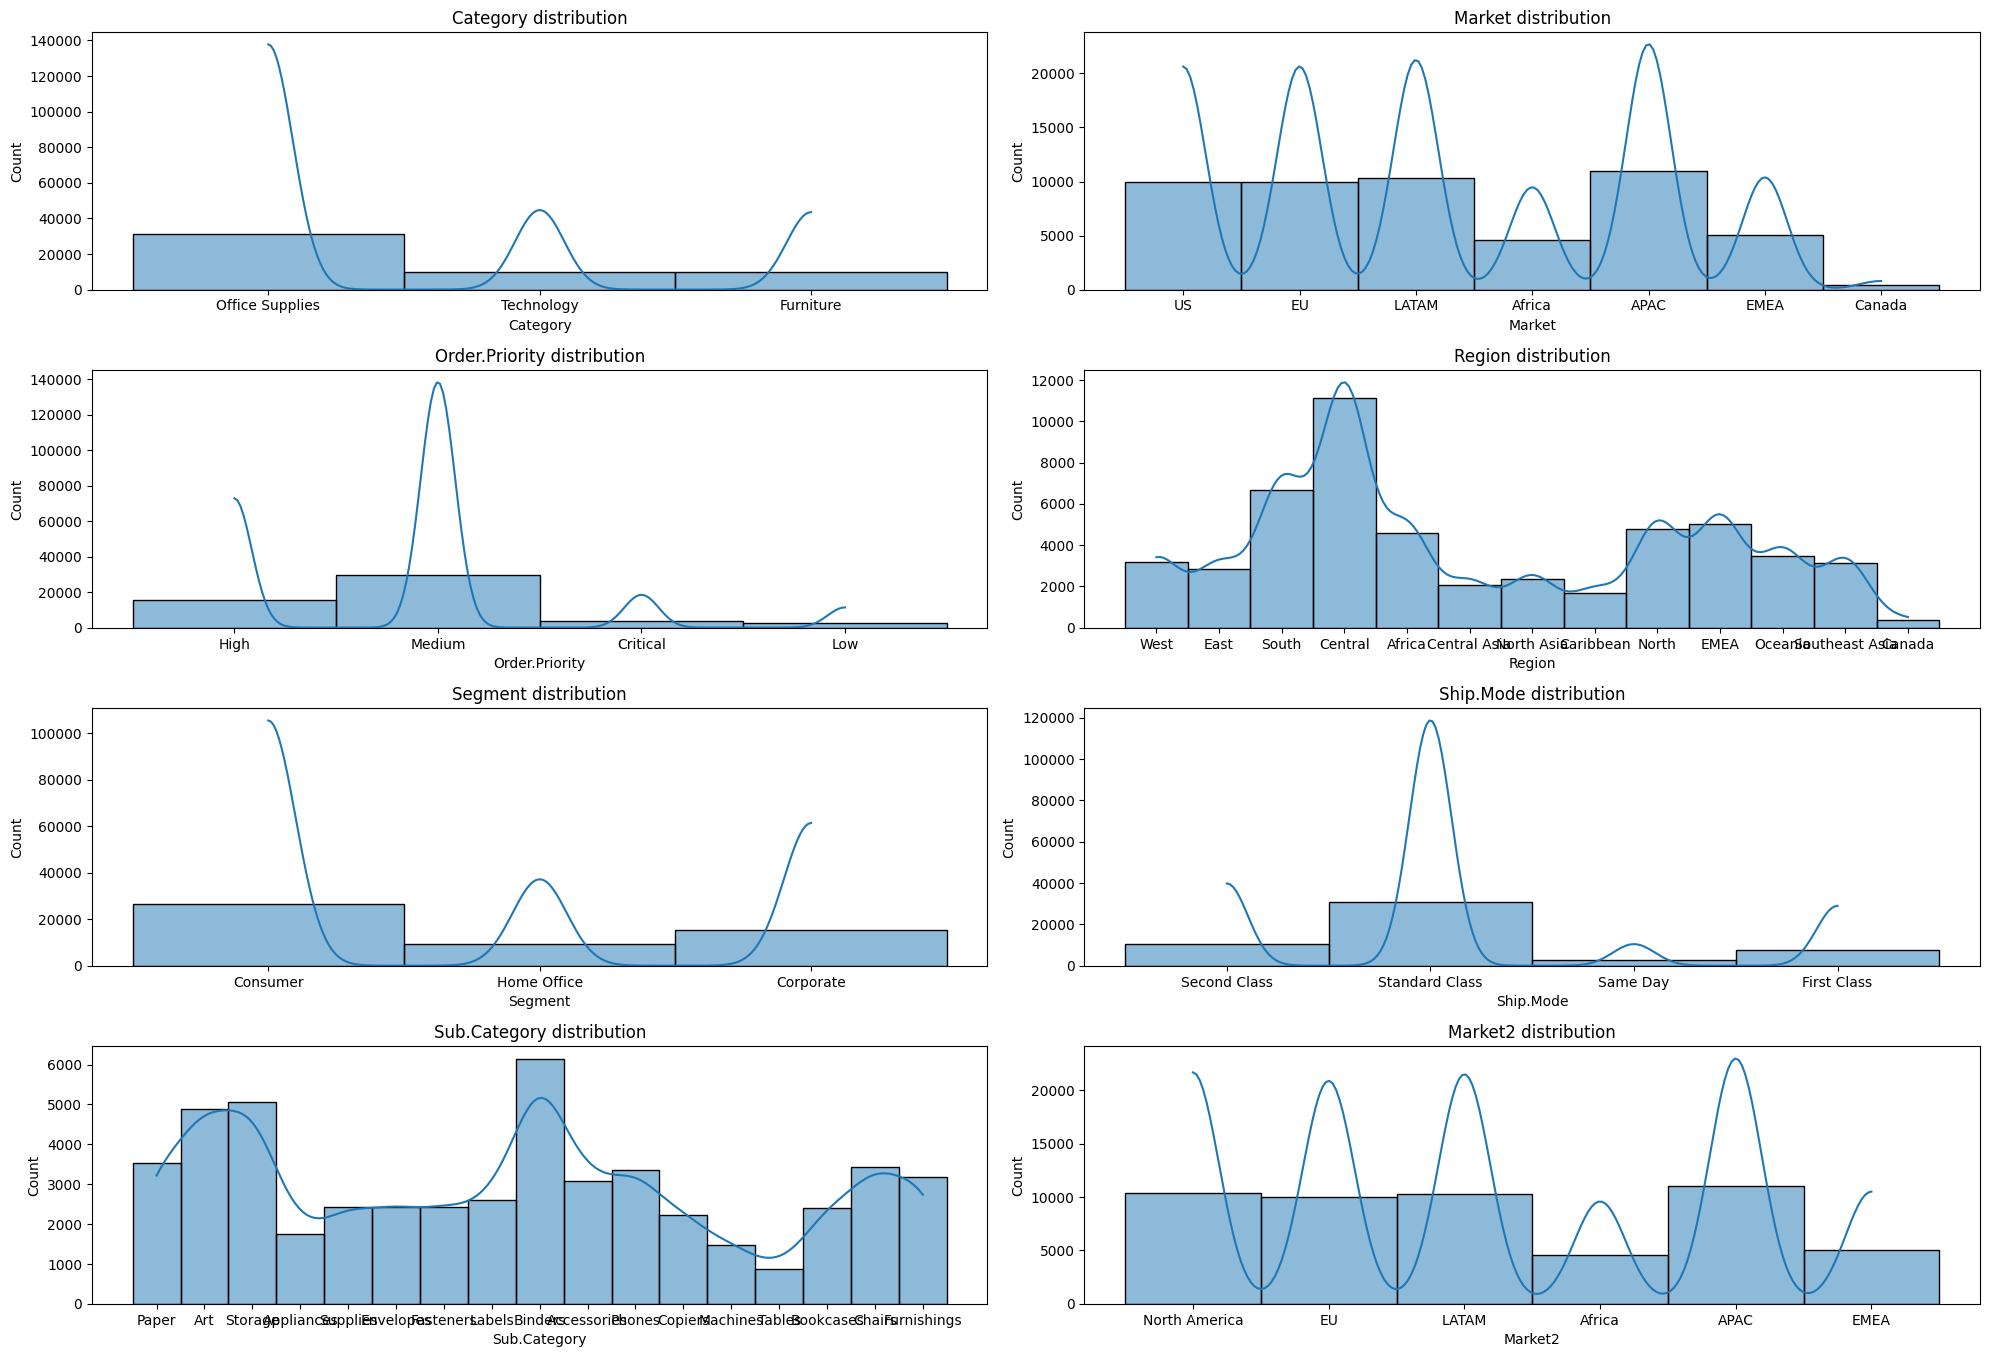

In [8]:
exp_cols = ['Category','Market','Order.Priority','Region','Segment','Ship.Mode','Sub.Category','Market2']
plt.figure(figsize=(20,20))
for i, column in enumerate(exp_cols):
    plt.subplot(6,2, i+1)
    sns.histplot(data=df, x=column, kde=True, bins=30)
    plt.title(f'{column} distribution')
    plt.tight_layout()

# **Visualize Relationships:**


In [9]:
# plt.figure(figsize=(14, 8))

# for i, column in enumerate(categorical_columns, 1):
#     plt.subplot(3, 4, i)
#     sns.boxplot(data=df, x=column, y='Sales')
#     plt.title(f'Boxplot of Sales by {column}')

# plt.tight_layout()
# plt.show()

In [10]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 24405 (\N{CJK UNIFIED IDEOGRAPH-5F55}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from current font.
  fig.canvas.draw()
/opt/conda/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 24405 (\N{CJK UNIFIED IDEOGRAPH-5F55}) missing from current font.
  fig.canvas.draw()
/opt/conda/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 259

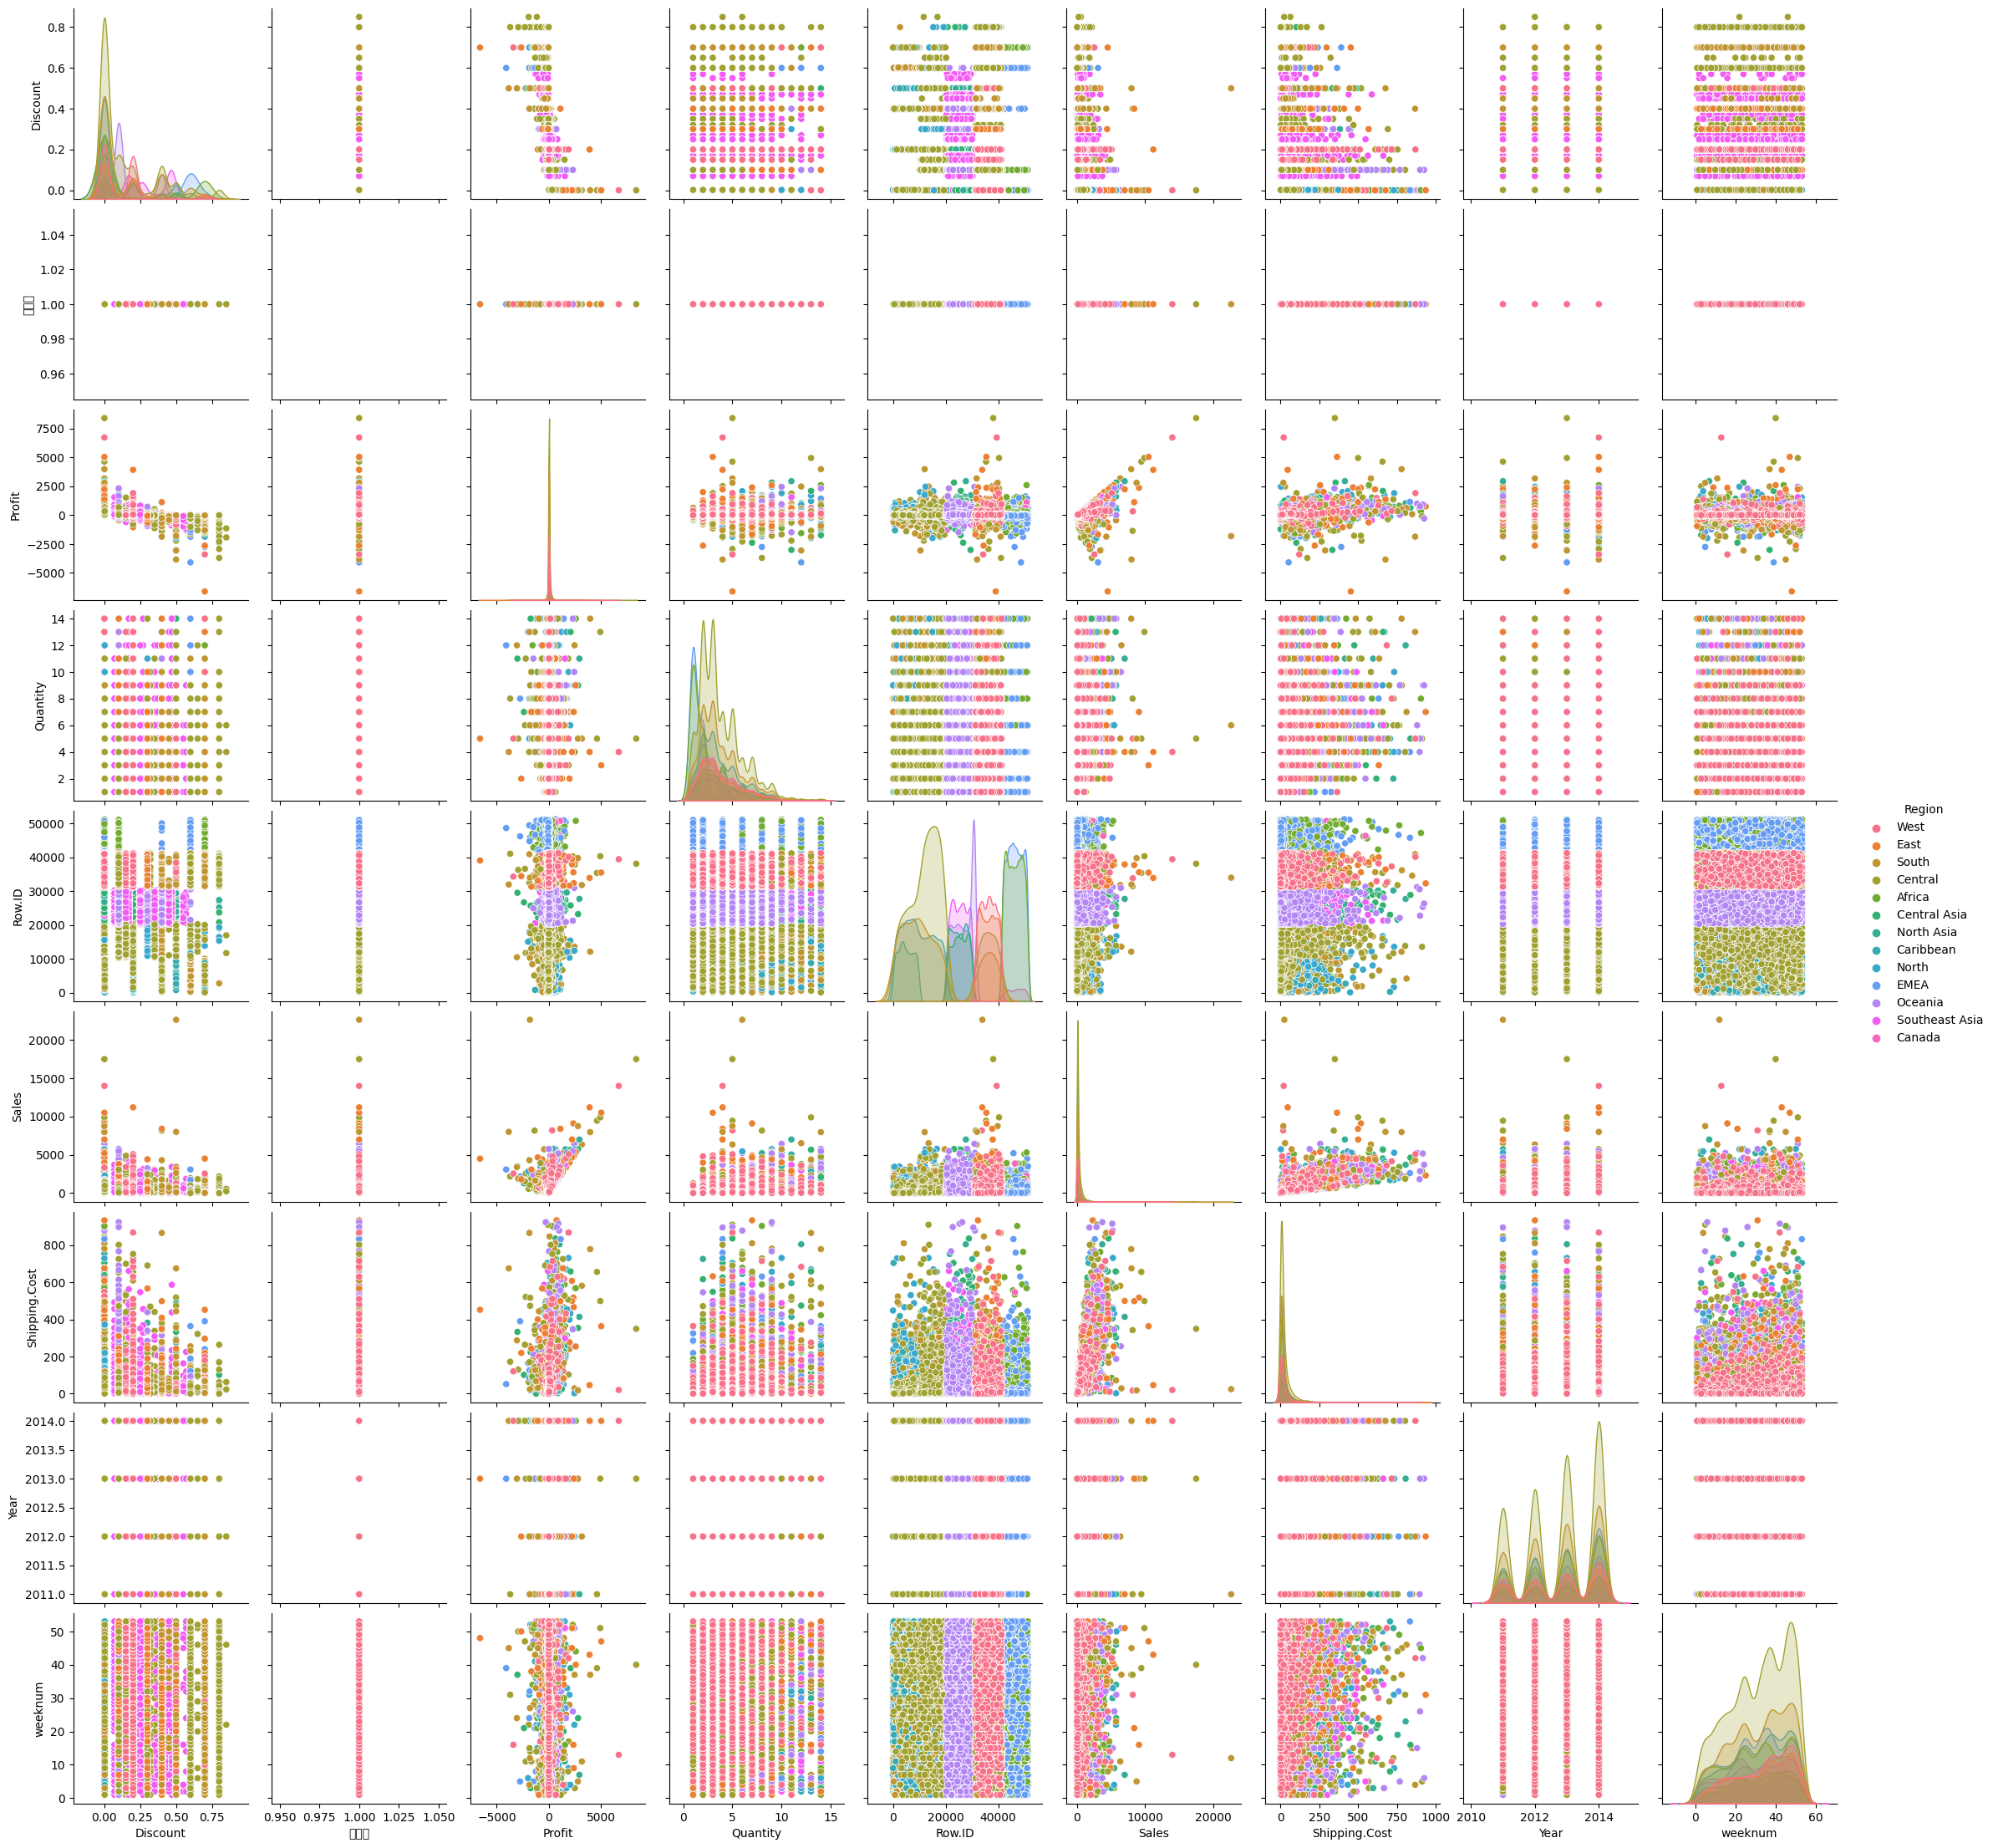

In [11]:
sns.pairplot(df, vars= numerical_columns, 
             hue='Region')
plt.show()

**Correlation Heatmap:**
Visualize the correlation between numerical variables.

/opt/conda/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from current font.
  fig.canvas.draw()
/opt/conda/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 24405 (\N{CJK UNIFIED IDEOGRAPH-5F55}) missing from current font.
  fig.canvas.draw()
/opt/conda/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.draw()
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24405 (\N{CJK UNIFIED IDEOGRAPH-5F55}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK

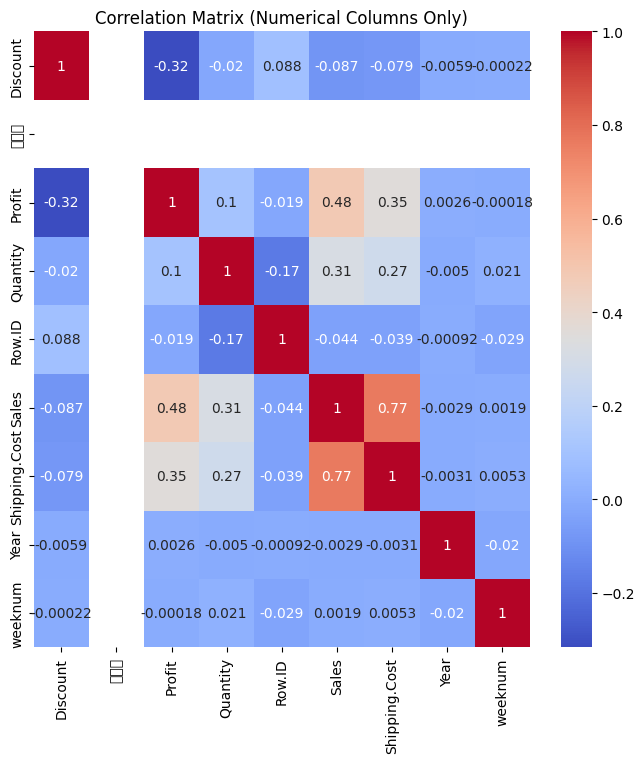

In [12]:
# Create a DataFrame containing only numerical columns
numerical_df = df[numerical_columns]

# Calculate correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numerical Columns Only)')
plt.show()

**FacetGrid**
A FacetGrid in seaborn allows you to create a grid of subplots based on the unique values of one or more categorical variables.

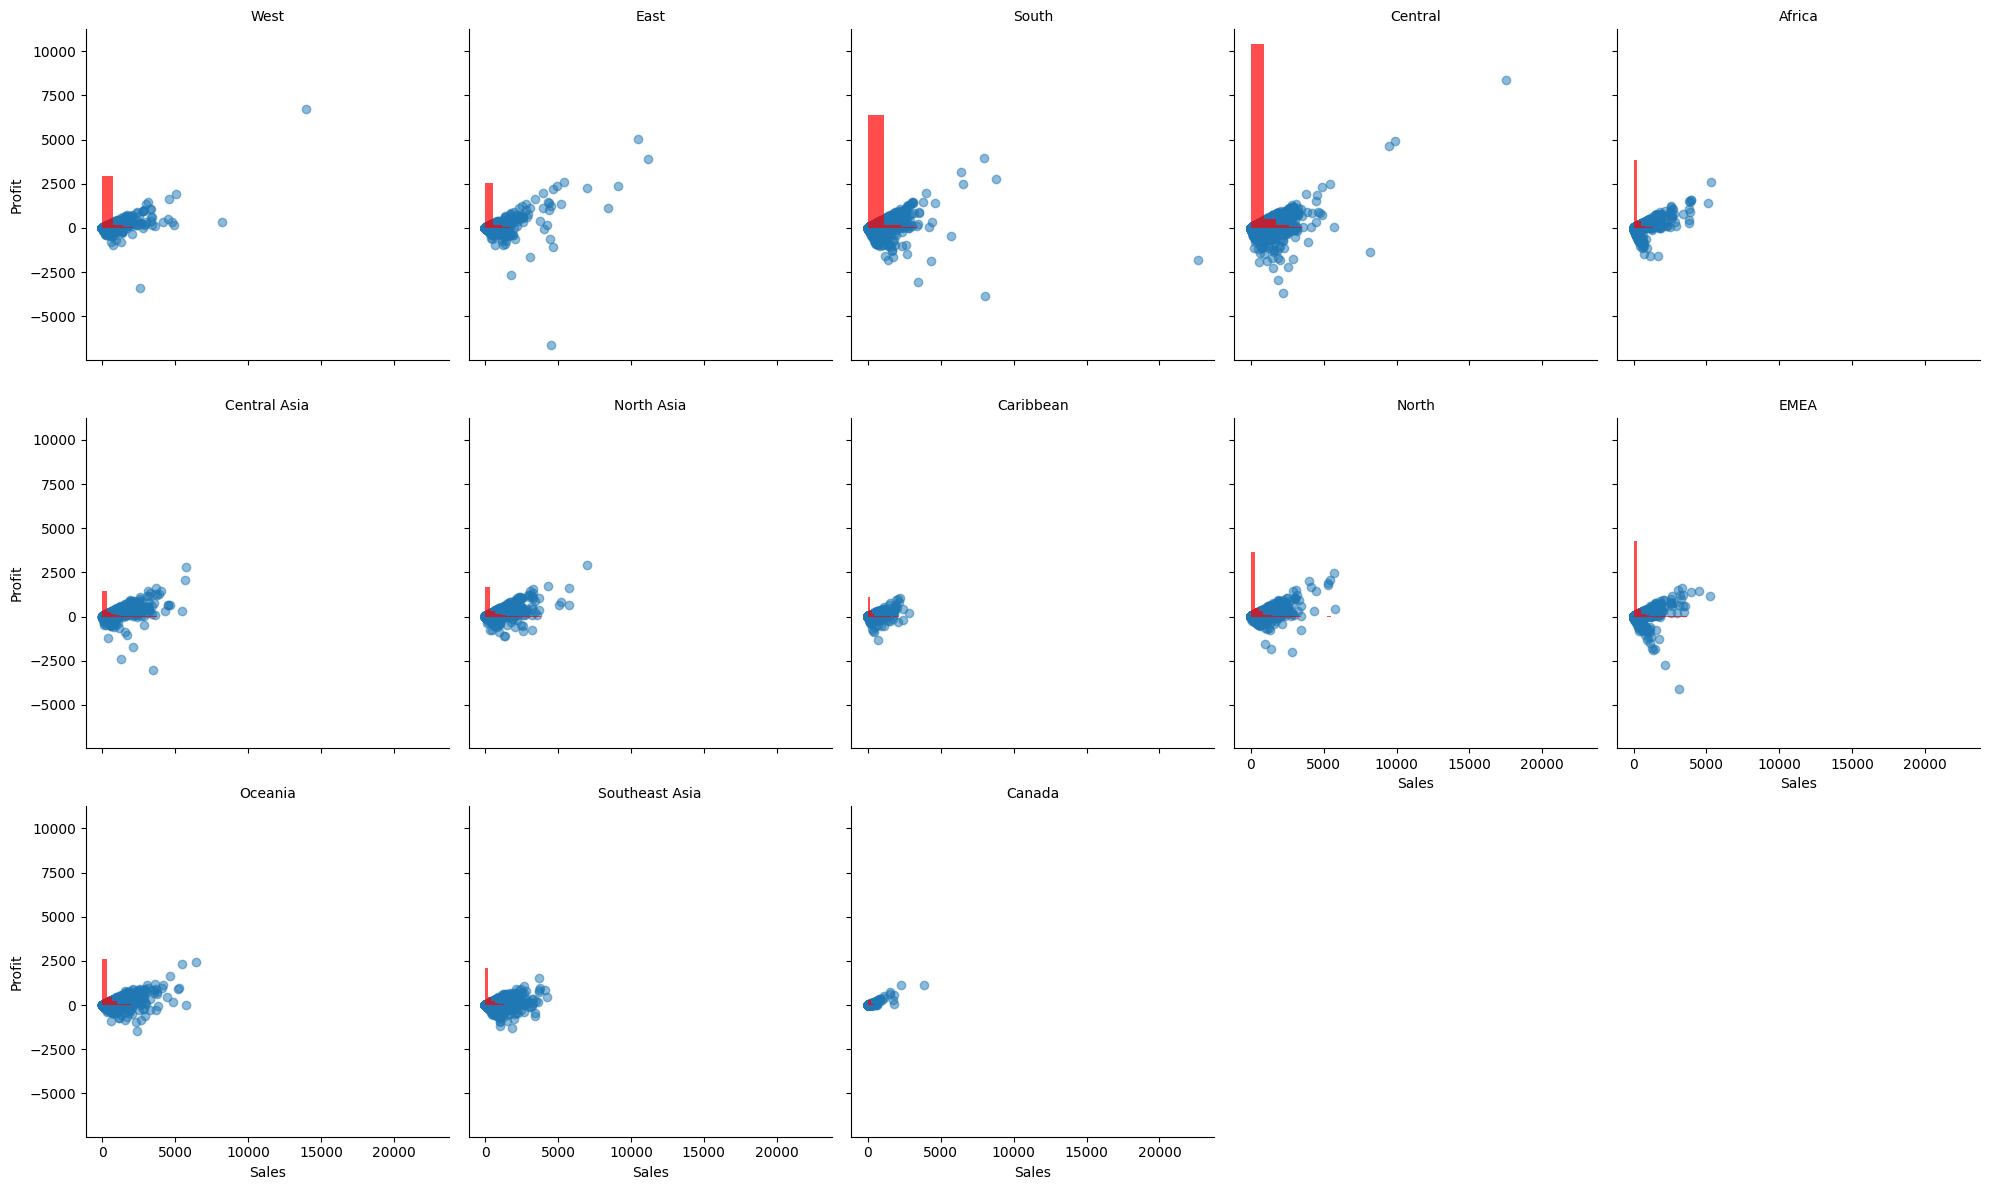

In [13]:
# Choose a categorical column with more unique values
categorical_column = 'Region'

# Create a FacetGrid
g = sns.FacetGrid(df, col=categorical_column, col_wrap=5, height=4)

# Scatter plot for numerical variables
g.map(plt.scatter, 'Sales', 'Profit', alpha=0.5)

# Histogram for a numerical variable
g.map(plt.hist, 'Sales', bins=20, color='r', alpha=0.7)

# Customize the appearance
g.set_axis_labels('Sales', 'Profit')
g.set_titles(col_template="{col_name}")
plt.show()